In [3]:
import os 
import matplotlib
import pandas  as pd 
import numpy as np
import seaborn as sns 

In [4]:
country_military_spending = pd.read_csv('military_spending_constant_2023.csv', sep = ',',    skiprows=5)
country_military_spending_2024 = country_military_spending[['Country','2024']]
country_military_spending_2024
us_spend = country_military_spending_2024[country_military_spending_2024['Country'] == 'United States of America'].copy()
other_countries_spend = country_military_spending_2024[country_military_spending_2024['Country'] != 'United States of America'].copy()
other_countries_spend = other_countries_spend.dropna()
other_countries_spend = other_countries_spend[other_countries_spend['2024'] != 'xxx']
other_countries_spend = other_countries_spend[other_countries_spend['2024'] != '...']
other_countries_spend['2024'] = np.array(other_countries_spend['2024'], dtype=float)
### Change US Spend to Billions


In [93]:
import pandas as pd
import numpy as np

nato_countries = [
    "United States of America", "Canada", "United Kingdom", "France", "Germany",
    "Italy", "Spain", "Portugal", "Greece", "Turkey", "Belgium", "Netherlands",
    "Luxembourg", "Norway", "Denmark", "Iceland", "Poland", "Czech Republic",
    "Hungary", "Slovakia", "Slovenia", "Romania", "Bulgaria", "Estonia", "Finland", 'Sweden',
    "Latvia", "Lithuania", "Croatia", "Albania", "Montenegro", "North Macedonia"
]
print(len(nato_countries))

# Load data
country_military_spending = pd.read_csv(
    'military_spending_constant_2023.csv',
    sep=',',
    skiprows=5
)

# Keep only relevant columns (2022 & 2024)
df = country_military_spending[['Country', '2022', '2024']].copy()

# Drop missing/invalid values
df = df.dropna()
df = df[(df['2022'] != 'xxx') & (df['2022'] != '...')]
df = df[(df['2024'] != 'xxx') & (df['2024'] != '...')]

# Convert to numeric
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')

# Drop rows with NaN after conversion
df = df.dropna()

# Filter only NATO countries
df_nato = df[df['Country'].isin(nato_countries)].copy()

# Calculate percentage increase
df_nato['pct_increase'] = ((df_nato['2024'] - df_nato['2022']) / df_nato['2022']) * 100

# Sort by largest increase
df_nato_sorted = df_nato.sort_values(by='pct_increase', ascending=False)

# Show top NATO countries by % increase
print(df_nato_sorted[['Country', '2022', '2024', 'pct_increase']].head(10))


32
         Country     2022     2024  pct_increase
139       Poland  18057.2  34488.3     90.994728
125      Albania    267.5    481.5     80.000000
158      Denmark   5801.2   9781.6     68.613390
166   Luxembourg    543.4    849.4     56.312109
168  Netherlands  14540.7  22439.2     54.319943
131      Estonia    917.5   1392.7     51.792916
172       Sweden   7963.0  11718.5     47.161874
135       Latvia    958.1   1404.8     46.623526
159      Finland   4852.8   6893.9     42.060254
161      Germany  61110.1  86301.3     41.222646


In [94]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path   # <-- add this
import zipfile, io, requests
# Harmonize a couple of names to match Natural Earth Admin-0 Countries
name_fix = {
    'Czech Republic': 'Czechia',
    # Natural Earth uses "North Macedonia"
    # Most other names match out of the box; add more if you see merge gaps
}
df_nato_sorted['ne_name'] = df_nato_sorted['Country'].replace(name_fix)

# --- 2) BASEMAP: use geodatasets for convenience (optional, for context/background) ---
# geodatasets offers naturalearth.land (handy as a light grey basemap under countries)
from geodatasets import get_path  # pip install geodatasets
land_path = get_path("naturalearth land")  # cached automatically
land = gpd.read_file(land_path)  # Polygon land masses
# land has no country boundaries; we use it only as a neutral background layer.

# --- 3) COUNTRIES GEOMETRY: fetch Admin-0 Countries from Natural Earth (country polygons) ---
# (geodatasets does not currently expose this layer)
ADMIN0_URL = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
cache_dir = Path("data/cache")
cache_dir.mkdir(parents=True, exist_ok=True)
admin_zip = cache_dir / "ne_110m_admin_0_countries.zip"
admin_dir = cache_dir / "ne_110m_admin_0_countries"

if not admin_dir.exists():
    if not admin_zip.exists():
        r = requests.get(ADMIN0_URL, timeout=60)
        r.raise_for_status()
        admin_zip.write_bytes(r.content)
    with zipfile.ZipFile(admin_zip, 'r') as zf:
        zf.extractall(admin_dir)

In [95]:
admin0 = gpd.read_file(str(admin_dir / "ne_110m_admin_0_countries.shp"))

# -------------------------
# 3. Keep only Europe + Turkey
# -------------------------
# Natural Earth uses uppercase column names
europe = admin0[(admin0['CONTINENT'] == 'Europe') | (admin0['NAME'] == 'Turkey')].copy()

# -------------------------
# 4. Merge NATO % change
# -------------------------
europe = admin0[admin0['CONTINENT'] == 'Europe'].copy()




findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sa

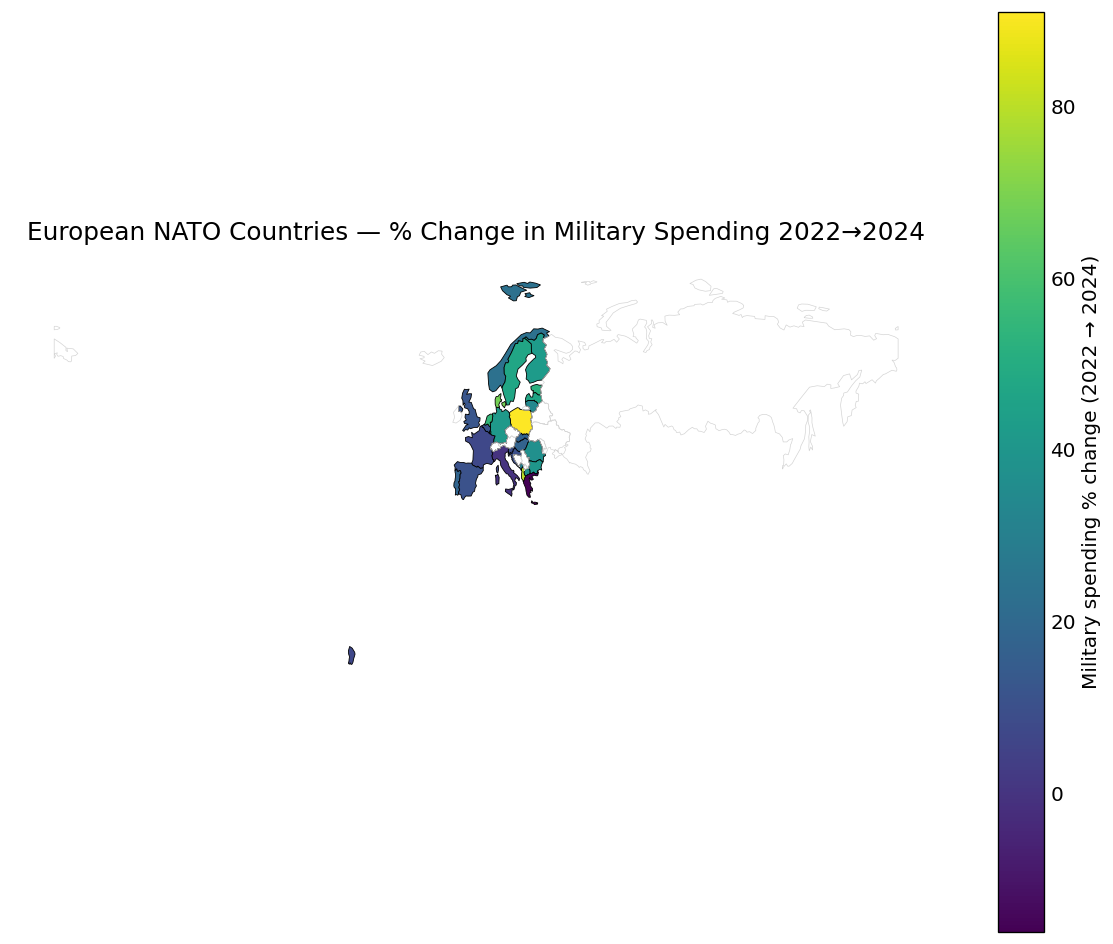

In [96]:
# -------------------------
# 4. Merge NATO % change
# -------------------------
merge = europe.merge(df_nato_sorted[['ne_name','pct_increase']], left_on='NAME', right_on='ne_name', how='left')

# -------------------------
# 5. Plot — Europe only
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Choropleth for NATO countries
merge.dropna(subset=['pct_increase']).plot(
    ax=ax,
    column='pct_increase',
    legend=True,
    legend_kwds={'label': 'Military spending % change (2022 → 2024)'},
    edgecolor='black',
    linewidth=0.5
)

# Outline for non-NATO European countries
merge[merge['pct_increase'].isna()].plot(
    ax=ax, facecolor='none', edgecolor='lightgray', linewidth=0.4
)

ax.set_title('European NATO Countries — % Change in Military Spending 2022→2024', pad=12)
ax.set_axis_off()
plt.tight_layout()
plt.show()

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sa

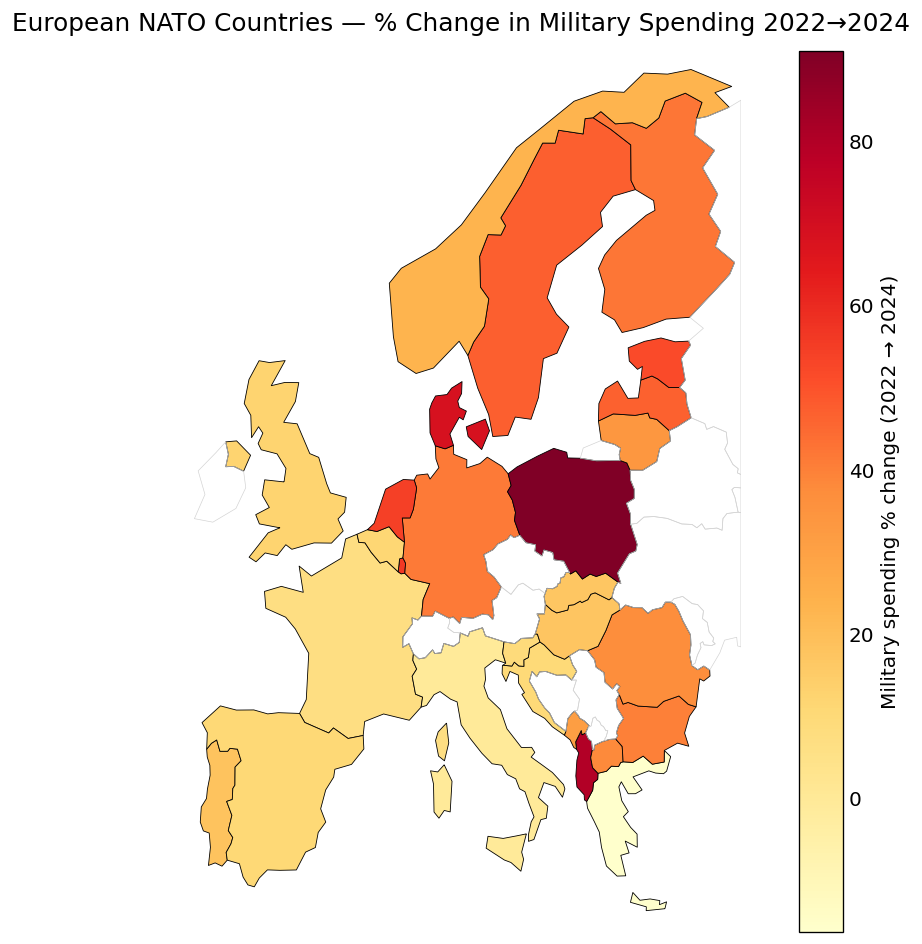

In [ ]:

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile, requests
from shapely.geometry import box
df = pd.read_csv('military_spending_constant_2023.csv', sep=',', skiprows=5)
df = df[['Country', '2022', '2024']].copy()

for col in ['2022', '2024']:
    df = df[df[col].notna()]
    df = df[(df[col] != 'xxx') & (df[col] != '...')]
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['2022','2024'])

df = df[df['Country'].isin(nato_countries)].copy()
df['pct_increase'] = (df['2024'] - df['2022']) / df['2022'] * 100

# Fix name mismatches for Natural Earth
name_fix = {"Czech Republic": "Czechia"}
df['ne_name'] = df['Country'].replace(name_fix)

# -------------------------
# 2) Natural Earth Admin-0 Countries (download/cache once)
# -------------------------
ADMIN0_URL = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
cache_dir = Path("data/cache")
cache_dir.mkdir(parents=True, exist_ok=True)
admin_zip = cache_dir / "ne_110m_admin_0_countries.zip"
admin_dir = cache_dir / "ne_110m_admin_0_countries"

if not admin_dir.exists():
    if not admin_zip.exists():
        r = requests.get(ADMIN0_URL, timeout=60)
        r.raise_for_status()
        admin_zip.write_bytes(r.content)
    with zipfile.ZipFile(admin_zip, 'r') as zf:
        zf.extractall(admin_dir)

admin0 = gpd.read_file(str(admin_dir / "ne_110m_admin_0_countries.shp"))

# -------------------------
# 3) Keep Europe only (strict) and clip to mainland bbox
#    bbox (lon/lat): roughly mainland Europe; excludes Iceland/Canaries/Azores
# -------------------------
europe = admin0[admin0['CONTINENT'] == 'Europe'].copy()

# Mainland Europe bounding box
# tweak if you want a little more/less margin
bbox = box(-11, 34, 32, 72)   # (min_lon, min_lat, max_lon, max_lat)
europe_mainland = gpd.clip(europe, bbox)

# -------------------------
# 4) Merge your % change onto the polygons
# -------------------------
merge = europe_mainland.merge(
    df[['ne_name','pct_increase']],
    left_on='NAME',
    right_on='ne_name',
    how='left'
)

# -------------------------
# 5) Plot — Europe (mainland) only, yellow → dark red
# -------------------------


findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sa

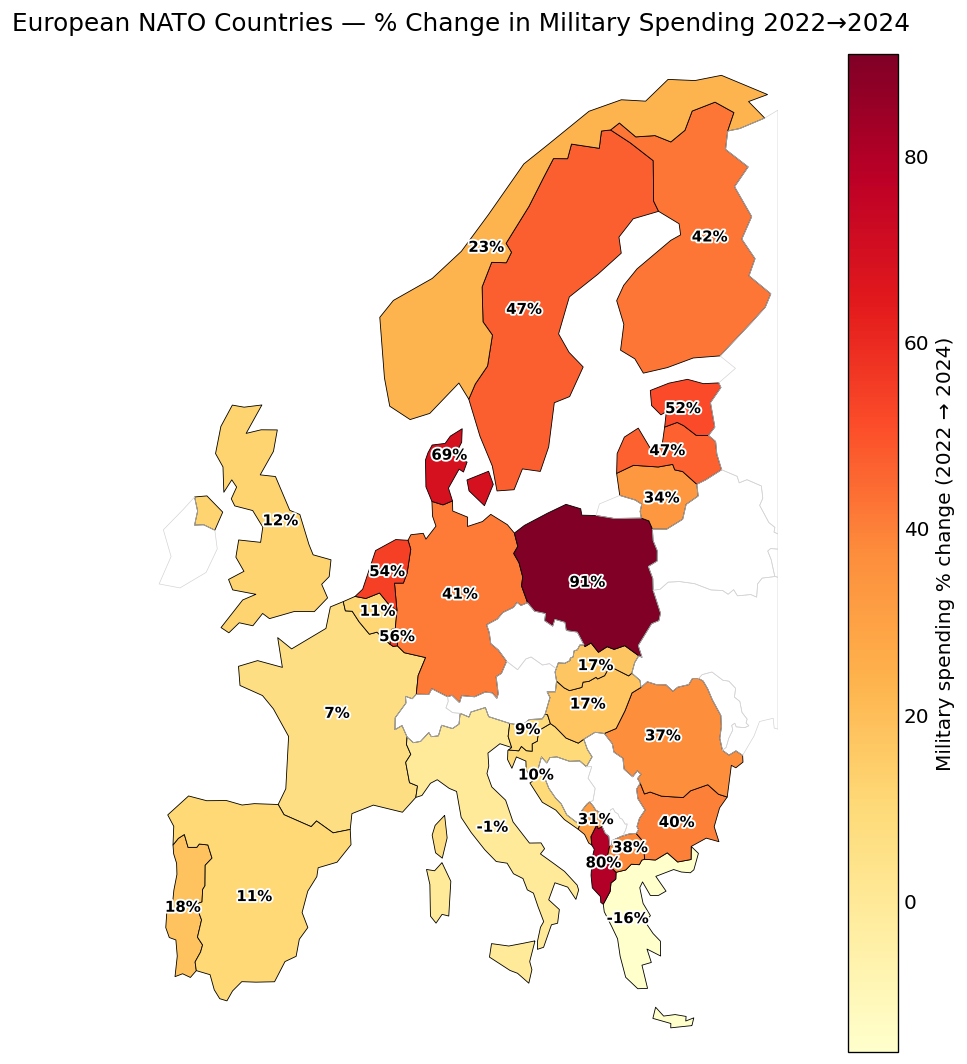

In [100]:
# -------------------------
# 5. Plot — Europe (mainland) only, yellow → dark red + labels
# -------------------------
import matplotlib.patheffects as pe
from shapely.geometry import Polygon, MultiPolygon

fig, ax = plt.subplots(figsize=(12, 9))

# Choropleth for NATO members with data
merge.dropna(subset=['pct_increase']).plot(
    ax=ax,
    column='pct_increase',
    cmap='YlOrRd',  # yellow -> dark red
    legend=True,
    legend_kwds={'label': 'Military spending % change (2022 → 2024)'},
    edgecolor='black',
    linewidth=0.5
)

# Outline other European countries for context
merge[merge['pct_increase'].isna()].plot(
    ax=ax, facecolor='none', edgecolor='lightgray', linewidth=0.4
)

# Optional: tiny-country nudges (lon, lat offsets in degrees)
nudges = {
    'Luxembourg': (0.2, 0.1),
    'Slovenia': (0.3, 0.15),
    'Montenegro': (0.25, 0.1),
    'North Macedonia': (0.25, 0.1),
    'Albania': (0.2, -0.05),
    'Belgium': (0.1, 0.2),
    'Netherlands': (0.1, 0.25),
    'Denmark': (0.25, 0.4)
}

# Helper: pick the largest polygon for labeling, then use a representative_point()
def label_point(geom):
    if isinstance(geom, MultiPolygon):
        geom = max(geom.geoms, key=lambda g: g.area)
    # representative_point() is guaranteed to lie within the polygon
    return geom.representative_point().coords[0]

# Add percentage labels directly on each NATO country shape
for _, row in merge.dropna(subset=['pct_increase']).iterrows():
    x, y = label_point(row.geometry)
    dx, dy = nudges.get(row['NAME'], (0.0, 0.0))
    ax.text(
        x + dx, y + dy,
        f"{row['pct_increase']:.0f}%",
        ha='center', va='center',
        fontsize=9, fontweight='bold', color='black',
        path_effects=[pe.withStroke(linewidth=2.2, foreground='white')]
    )

# Tighten the view to the mainland bounding box you defined earlier
ax.set_xlim(bbox.bounds[0], bbox.bounds[2])
ax.set_ylim(bbox.bounds[1], bbox.bounds[3])

ax.set_title('European NATO Countries — % Change in Military Spending 2022→2024', pad=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sa

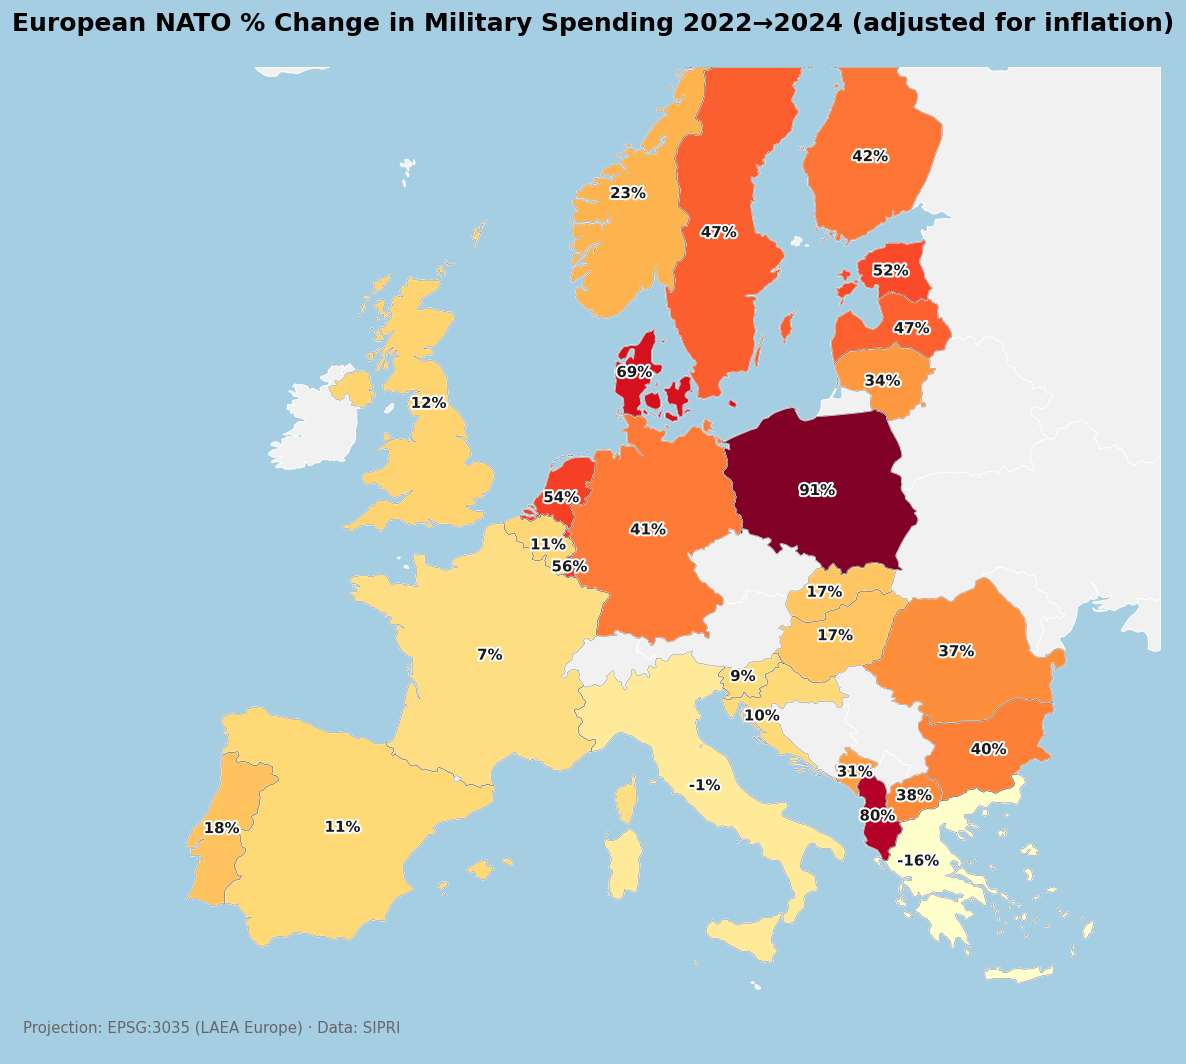

In [112]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from pathlib import Path
import zipfile, requests
from shapely.geometry import box, MultiPolygon

# --------------------------------------------------------
# A) DATA: assumes you already built df with 'ne_name' and 'pct_increase'
#    If not, keep your earlier cleaning. Only the map code is “new”.
# --------------------------------------------------------

# --------------------------------------------------------
# B) Load a nicer basemap: Natural Earth "Admin-0 Countries" (50m)
# --------------------------------------------------------
NE_URL = "https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip"
cache_dir = Path("data/cache")
cache_dir.mkdir(parents=True, exist_ok=True)
zip_path = cache_dir / "ne_50m_admin_0_countries.zip"
extract_dir = cache_dir / "ne_50m_admin_0_countries"

if not extract_dir.exists():
    if not zip_path.exists():
        r = requests.get(NE_URL, timeout=60)
        r.raise_for_status()
        zip_path.write_bytes(r.content)
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(extract_dir)

world = gpd.read_file(str(extract_dir / "ne_50m_admin_0_countries.shp"))

# Columns are usually uppercase in NE 50m
europe = world[world["CONTINENT"] == "Europe"].copy()

# --------------------------------------------------------
# C) Project to a Europe-friendly projection (EPSG:3035 - LAEA Europe)
#    and compute representative label points AFTER projection.
# --------------------------------------------------------
europe_3035 = europe.to_crs(3035)

# Merge your % change data (df[['ne_name','pct_increase']]) onto the map
merge = europe_3035.merge(
    df[["ne_name", "pct_increase"]],
    left_on="NAME",
    right_on="ne_name",
    how="left"
)

# Mainland extent (in projected meters) – tight and neat
# You can loosen/tighten this if you want more/less context
minx, miny, maxx, maxy = merge.total_bounds
# Clip a bit to central Europe to avoid far islands
# (values tuned for EPSG:3035; adjust to taste)
minx, miny, maxx, maxy = 2000000, 1200000, 6200000, 4800000
clip_box = gpd.GeoDataFrame(geometry=[box(minx, miny, maxx, maxy)], crs=merge.crs)
merge = gpd.overlay(merge, clip_box, how="intersection")

# Helper: label point inside largest polygon
def inside_label_point(geom):
    if isinstance(geom, MultiPolygon):
        geom = max(geom.geoms, key=lambda g: g.area)
    return geom.representative_point().coords[0]

# Precompute label points only for countries with data
labels = merge.dropna(subset=["pct_increase"]).copy()
labels["label_x"], labels["label_y"] = zip(*labels.geometry.apply(inside_label_point))

# --------------------------------------------------------
# D) Plot — refined aesthetics
# --------------------------------------------------------
plt.rcParams.update({"figure.facecolor": "#a6cee3"})
fig, ax = plt.subplots(figsize=(12, 9))

# Light, warm background for the axes
ax.set_facecolor("#a6cee3")   # soft ocean blue
# Draw all of Europe outlines (for context)
europe_outline = europe_3035.overlay(clip_box, how="intersection")
europe_outline.plot(ax=ax, facecolor="#f1f1f1", edgecolor="white", linewidth=0.6, zorder=1)

# Choropleth for NATO countries (those with data merged)
# Yellow -> dark red as requested
countries = merge.dropna(subset=["pct_increase"])
chor = countries.plot(
    ax=ax,
    column="pct_increase",
    cmap="YlOrRd",
    linewidth=0.7,
    edgecolor="white",
    zorder=2
)

# Thin gray hairline on top for subtle separation
countries.boundary.plot(ax=ax, linewidth=0.2, edgecolor="#444444", zorder=3)

# Labels on top of each country polygon (bold with white halo)
for _, r in labels.iterrows():
    ax.text(
        r["label_x"], r["label_y"],
        f"{r['pct_increase']:.0f}%",
        ha="center", va="center",
        fontsize=9, fontweight="bold", color="#1a1a1a",
        path_effects=[pe.withStroke(linewidth=2.4, foreground="white")],
        zorder=4
    )

# Colorbar — clean and compact
sm = plt.cm.ScalarMappable(
    norm=plt.Normalize(vmin=countries["pct_increase"].min(), vmax=countries["pct_increase"].max()),
    cmap="YlOrRd"
)
sm._A = []
#cbar = fig.colorbar(sm, ax=ax, shrink=0.82, pad=0.015)
#cbar.set_label("Military spending % change (2022 → 2024)", rotation=90, labelpad=12)
# format ticks as integers with a % sign
#cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, pos: f"{int(v)}%"))

# Title + subtitle + caption
ax.set_title("European NATO % Change in Military Spending 2022→2024 (adjusted for inflation)",
             fontsize=15, pad=10, loc="left", weight = 'bold')
ax.text(0.01, 0.02,
        "Projection: EPSG:3035 (LAEA Europe) · Data: SIPRI",
        transform=ax.transAxes, fontsize=9, color="#666666")

# Tight extent and no axes
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_axis_off()

plt.tight_layout()
plt.savefig(fname = 'europe_increase_military_spending.png',dpi = 1000)

plt.show()


In [5]:
other_countries_spend = other_countries_spend.sort_values(by='2024', ascending = False)
other_countries_spend["cum_sum"] = other_countries_spend['2024'].cumsum()
needed = other_countries_spend[other_countries_spend["cum_sum"] < float(us_spend['2024'])]

needed_countries = needed['Country'].astype(str).tolist()
needed_spends = needed['2024'].astype(float).tolist()


## Change Spends to be in the order of billions
needed_spends = np.array(needed_spends)/1000
needed_spends = needed_spends.tolist()
us_spend['2024'] = float(us_spend['2024'])/1000

/var/folders/cw/m3xj051j4qdfbhhykf_lxz6r0000gp/T/ipykernel_95470/3575772295.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  needed = other_countries_spend[other_countries_spend["cum_sum"] < float(us_spend['2024'])]
/var/folders/cw/m3xj051j4qdfbhhykf_lxz6r0000gp/T/ipykernel_95470/3575772295.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  us_spend['2024'] = float(us_spend['2024'])/1000


/var/folders/cw/m3xj051j4qdfbhhykf_lxz6r0000gp/T/ipykernel_95470/477789150.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax.set_ylim(0, max(float(us_spend['2024']), sum(needed_spends)) * 1.15)
/var/folders/cw/m3xj051j4qdfbhhykf_lxz6r0000gp/T/ipykernel_95470/477789150.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  us_val = float(us_spend[year_label])
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 

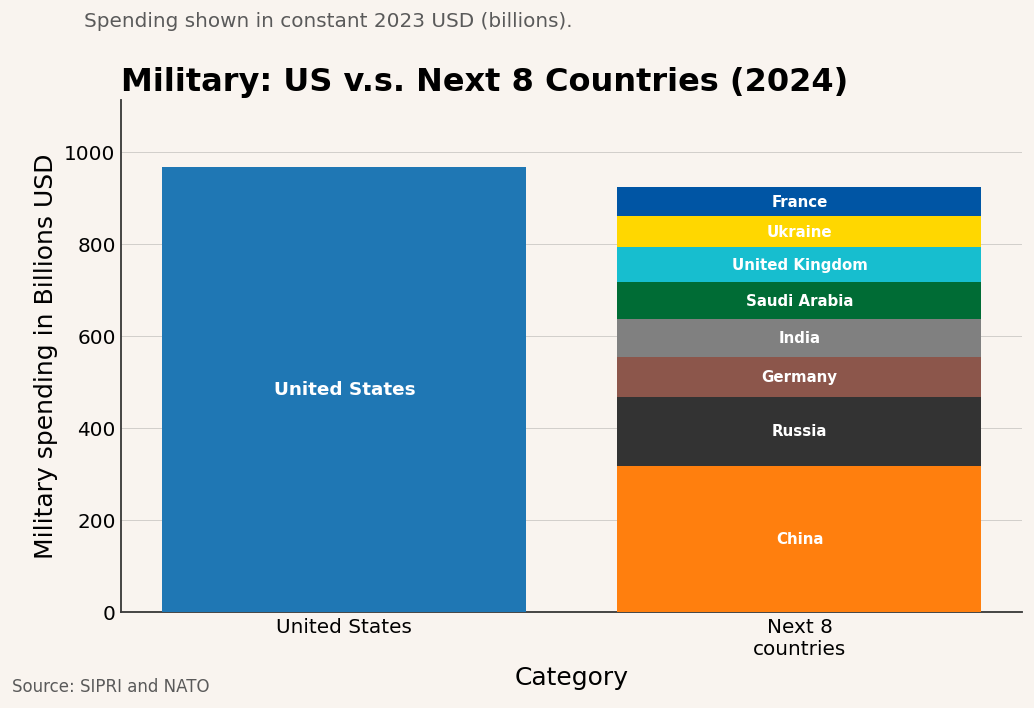

In [6]:
# ---- Plot: US vs stacked "Next N countries" ----
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# -----------------------
# Economist / FT-like Matplotlib style
# -----------------------
def set_pubstyle_econ_ft(base_fontsize=12):
    mpl.rcParams.update({
        # Typography
        "font.family": ["IBM Plex Sans", "Source Sans 3", "Lato", "DejaVu Sans"],
        "font.size": base_fontsize,
        "axes.titlesize": base_fontsize * 1.6,
        "axes.labelsize": base_fontsize * 1.25,
        "legend.fontsize": base_fontsize * 0.95,
        "xtick.labelsize": base_fontsize * 1.0,
        "ytick.labelsize": base_fontsize * 1.0,

        # Lines & grid
        "axes.grid": True,
        "grid.linestyle": "-",
        "grid.linewidth": 0.6,
        "grid.alpha": 0.35,
        "axes.axisbelow": True,

        # Spines
        "axes.spines.top": False,
        "axes.spines.right": False,

        # Figure
        "figure.dpi": 120,
        "savefig.dpi": 300,
        "savefig.bbox": "tight",

        # Legend
        "legend.frameon": False,
        "legend.loc": "upper left",

        # Tick params
        "xtick.major.size": 0,
        "ytick.major.size": 0,
        "xtick.minor.size": 0,
        "ytick.minor.size": 0,
    })

def economist_axis_touches(ax):
    ax.spines["left"].set_linewidth(1.1)
    ax.spines["bottom"].set_linewidth(1.1)
    ax.spines["left"].set_color("#3a3a3a")
    ax.spines["bottom"].set_color("#3a3a3a")
    ax.grid(axis="y", color="#8a8a8a")
    ax.grid(axis="x", visible=False)

def add_caption(fig, text, y_offset=0.02):
    fig.text(0.0, y_offset, text, ha="left", va="bottom", fontsize=10, color="#5a5a5a")

# -----------------------------------------
# Example data (replace with your real data)
# -----------------------------------------
year_label = "2024"  # keep consistent with title
#us_spend = {year_label: 916_000}  # millions, example only

#needed_countries = ["China", "Russia", "India", "UK", "Germany"]
#needed_spends =    [296_000, 109_000,  87_000,  74_000,   66_000]  # millions, example only

xtick_step = 1  # not crucial here, but kept in case you reuse

# -----------------------
# Build the plot
# -----------------------
set_pubstyle_econ_ft(base_fontsize=12)

fig = plt.figure(figsize=(10, 6.2), facecolor="#f9f4ef")
ax = plt.gca()
ax.set_facecolor("#f9f4ef")

economist_axis_touches(ax)
ax.set_ylim(0, max(float(us_spend['2024']), sum(needed_spends)) * 1.15)

# Titles & labels
ax.set_xlabel("Category")
ax.set_ylabel("Military spending in Billions USD")
ax.set_title(f"Military: US v.s. Next 8 Countries ({year_label})", loc="left", fontweight="bold")

subtitle = "Spending shown in constant 2023 USD (billions)."

fig.suptitle(subtitle, x=0.06, y=0.94, ha="left", fontsize=12, color="#5a5a5a")

# X axis ticks (no real 'years' here, so use a neutral locator)
ax.xaxis.set_major_locator(mticker.FixedLocator([0, 1]))
country_colors = {
    "Russia": "#333333",                  # near-black
    "China": "#FF7F0E",                   # orange
    "United States of America": "#1f77b4",# strong blue
    "United Kingdom": "#17becf",          # cyan / teal
    "France": "#0055A4",                  # deep flag blue
    "Ukraine": "#FFD700",                 # golden yellow
    "Germany": "#8c564b",                 # brownish gray
    "Saudi Arabia": "#006C35"             # emerald green
}



# Bars
x_positions = [0, 1]
us_name = "United States"

us_val = float(us_spend[year_label])
us_bar = ax.bar(x_positions[0], us_val, zorder=3, color="#1F77B4")  # optional color
# Put label in the middle of the bar
ax.text(
    x_positions[0], us_val/2, us_name,
    ha="center", va="center", fontsize=11, color="white", fontweight="bold"
)

bottom = 0.0
for cname, cval in zip(needed_countries, needed_spends):
    bar = ax.bar(
        x_positions[1], cval, bottom=bottom, zorder=3,
        color=country_colors.get(cname, "gray")  # fallback if not mapped
    )
    
    # Position text in the middle of the segment
    ax.text(
        x_positions[1], bottom + cval/2, cname,
        ha="center", va="center", fontsize=9, color="white", fontweight="bold"
    )
    
    bottom += cval

# X tick labels (two-line label for the right bar)
ax.set_xticks(x_positions)
ax.set_xticklabels([us_name, f"Next {len(needed_countries)}\ncountries"])

# Legend (list stacked countries clearly)
#ax.legend(title="Stacked countries", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

# Caption/source (optional)
add_caption(fig, "Source: SIPRI and NATO")

plt.tight_layout(rect=[0, 0, 0.86, 0.95])  # leave room for the outside legend & suptitle
plt.savefig(fname = 'total_military_spending_comparison.png',dpi = 1000)

plt.show()


In [7]:

# NATO members (as listed in your dataset — adjust names if needed)
nato_countries = [
    "United States of America", "Canada", "United Kingdom", "France", "Germany",
    "Italy", "Spain", "Portugal", "Greece", "Turkey", "Belgium", "Netherlands",
    "Luxembourg", "Norway", "Denmark", "Iceland", "Poland", "Czech Republic",
    "Hungary", "Slovakia", "Slovenia", "Romania", "Bulgaria", "Estonia",
    "Latvia", "Lithuania", "Croatia", "Albania", "Montenegro", "North Macedonia"
]

# List of European NATO countries (exclude US & Canada)
# European NATO members
european_nato = [
    "Albania",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Czechia",
    "Denmark",
    "Estonia",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "United Kingdom",
    "Türkiye"   # transcontinental but NATO member, listed as "Türkiye" in SIPRI
]



# Canada
canada_nato = ["Canada"]

# United States
us_nato = ["United States of America"]


# Load dataset
country_military_spending = pd.read_csv(
    "military_expenditures_in_shared_of_gdp.tsv",
    sep="\t",
    skiprows=5
)

# Keep only NATO members
nato_spending = country_military_spending[
    country_military_spending["Country"].isin(nato_countries)
]

us_military_spending = country_military_spending[
    country_military_spending["Country"].isin(us_nato)
]


# Reshape to long format
nato_long = nato_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Keep only numeric years
nato_long = nato_long[nato_long["Year"].str.isnumeric()]
nato_long["Year"] = nato_long["Year"].astype(int)
nato_long = nato_long[nato_long["Spending"] != "..."]

nato_long["Spending"] = (
    nato_long["Spending"]
    .replace(r"%", "", regex=True)
    .astype(float)
)
nato_long["Spending"] = nato_long["Spending"].astype(float)
europe_long = nato_long[nato_long["Country"].isin(european_nato)]



us_long = us_military_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Convert Year to int (if they are strings)
us_long = us_long[us_long["Year"].str.isnumeric()]

us_long["Year"] = us_long["Year"].astype(int)
us_long["Spending"] = (
    us_long["Spending"]
    .replace(r"%", "", regex=True)
    .astype(float)
)
us_long["Spending"] = us_long["Spending"].astype(float)

# Build a long-form dataframe for ALL countries (no NATO filter)



all_long = country_military_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Clean it the same way
all_long = all_long[all_long["Year"].astype(str).str.isnumeric()].copy()
all_long["Year"] = all_long["Year"].astype(int)

all_long = all_long[~all_long["Spending"].isin(["...", ". ."])].copy()
all_long["Spending"] = (
    all_long["Spending"].astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)
all_long = all_long[pd.to_numeric(all_long["Spending"], errors="coerce").notna()].copy()
all_long["Spending"] = all_long["Spending"].astype(float)

# Russia & China series (averages per year in case of duplicates)
russia_avg = (
    all_long[all_long["Country"] == "Russia"]
    .groupby("Year")["Spending"].mean().reset_index()
)
china_avg = (
    all_long[all_long["Country"] == "China"]
    .groupby("Year")["Spending"].mean().reset_index()
)






findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sa

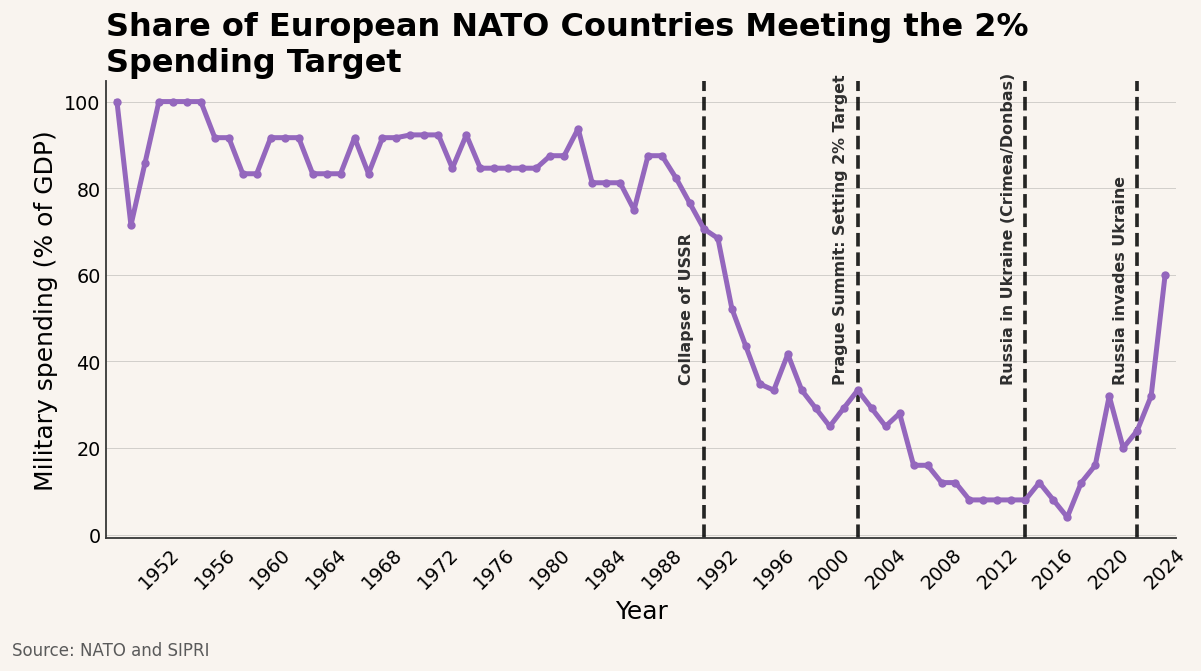

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter to European NATO countries
eu = nato_long[nato_long["Country"].isin(european_nato)].copy()

# For each year: percentage of countries with Spending >= 2 (only among countries with data that year)
eu_yearly = (
    eu.groupby("Year")["Spending"]
      .agg(total=lambda s: s.notna().sum(),
           hits=lambda s: (s >= 2).sum())
      .reset_index()
)
eu_yearly["pct_above_2"] = eu_yearly["hits"] / eu_yearly["total"] * 100

# Plot
fig = plt.figure(figsize=(10, 6.2), facecolor="#f9f4ef")  # very light tan
ax = plt.gca()
ax.set_facecolor("#f9f4ef")  # match background for the plotting area
set_pubstyle_econ_ft(base_fontsize=12)

ax.tick_params(axis="both", which="major", labelsize=14)
economist_axis_touches(ax)
ax.plot(
    eu_yearly["Year"], eu_yearly["pct_above_2"],
    linewidth=3, marker="o", markersize=4, color="#9467BD",  # purple (colorblind-friendly)
    label="European NATO at ≥ 2%"
)

events = [
    (1991, "Collapse of USSR"),
    (2002, "Prague Summit: Setting 2% Target"),
    (2014, "Russia in Ukraine (Crimea/Donbas)"),
    (2022, "Russia invades Ukraine")
]


# Draw the vertical lines
for x, _ in events:
    ax.axvline(x=x, color="black", linestyle="--", linewidth=2.2, alpha=0.85, zorder=1)

# Place labels *inside* the plot, close to bottom
ymin, ymax = ax.get_ylim()
label_y = ymin + 0.1 * (ymax - ymin)   # 10% above bottom

for x, label in events:
    ax.text(
        x - 1.75, label_y + 25,
        label,
        rotation=90,
        fontsize=9.5,
        va="bottom", ha="left",
        color="#2f2f2f", weight = 'bold',
        bbox=dict(facecolor="none", edgecolor="none", pad=2.2),
        zorder=5
    )
# Formatting
#ax.title("Share of European NATO Countries Meeting the 2% Guideline", fontsize=18, fontweight="bold")


subtitle = "Spending shown in constant 2023 USD (billions)."


ax.set_title(f"Share of European NATO Countries Meeting the 2% \nSpending Target", loc="left", fontweight="bold")
#fig.suptitle(subtitle, x=0.06, y=0.94, ha="left", fontsize=12, color="#5a5a5a")

ax.set_xlabel("Year")
ax.set_ylabel("Military spending (% of GDP)")



# Ticks: nice integer years if your x is datetime/int; adjust as needed
ax.margins(x=0.01)
ax.tick_params(axis="both", which="major", labelsize=11.5)

# Caption / source note
add_caption(fig, "Source: NATO and SIPRI")
import matplotlib.ticker as mticker

# Get current number of ticks
import matplotlib.ticker as mticker

# Get how many ticks you currently have
num_ticks = len(ax.get_xticks())

# Request roughly double
ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=num_ticks * 2))
ax.tick_params(axis="x", rotation=45)   # rotate all x tick labels
plt.tight_layout(rect=[0, 0.04, 1, 0.92])
plt.savefig(fname = 'european_countries_meeting_2_percent_target.png',dpi = 1000)

plt.show()

In [ ]:
import pandas as pd

# Load the CSV
file_path = "social_spending_ssocx.csv"
df = pd.read_csv(file_path)

# Select and rename relevant columns
df_clean = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].rename(
    columns={
        "Reference area": "Country",
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "Public social spending (% of GDP)"
    }
)

# Convert year to integer
df_clean["Year"] = df_clean["Year"].astype(int)

# Convert spending to numeric
df_clean["Public social spending (% of GDP)"] = pd.to_numeric(df_clean["Public social spending (% of GDP)"], errors="coerce")

print(df_clean.head())
df_clean = df_clean.dropna()
df_clean

   Country  Year  Public social spending (% of GDP)
0  Romania  1980                                NaN
1  Romania  1981                                NaN
2  Romania  1982                                NaN
3  Romania  1983                                NaN
4  Romania  1984                                NaN


findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sa

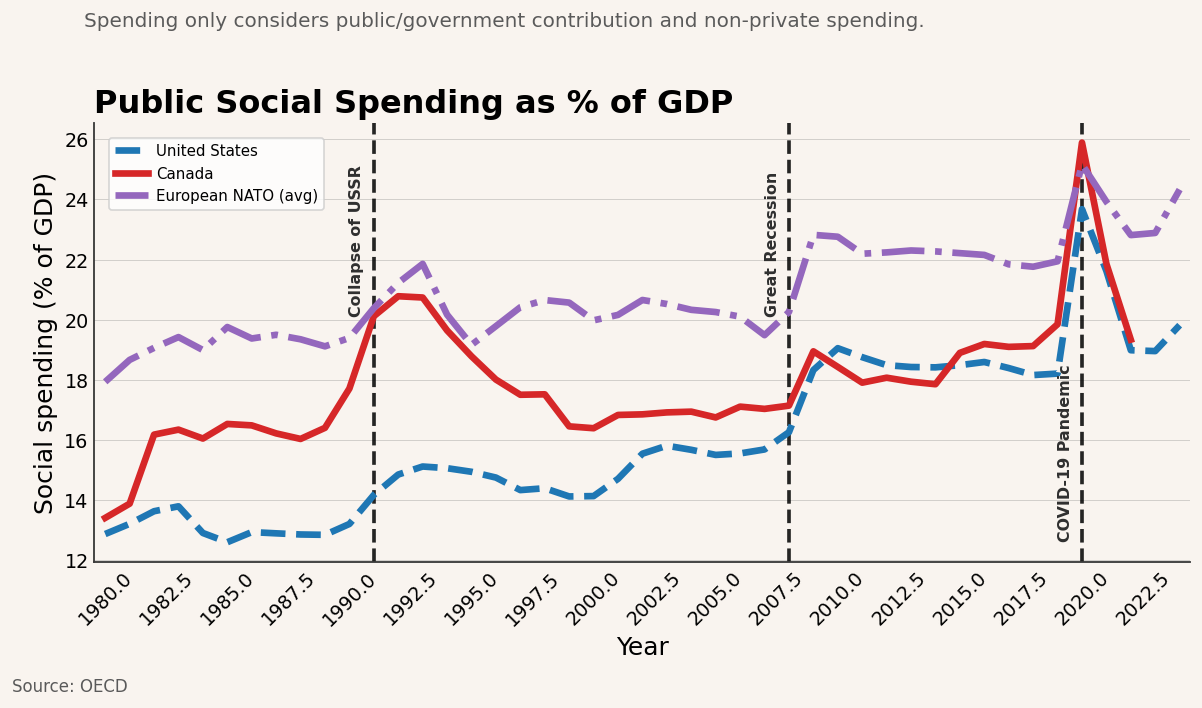

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_clean

# Full NATO list you gave
nato_countries = [
    "United States", "Canada", "United Kingdom", "France", "Germany",
    "Italy", "Spain", "Portugal", "Greece", "Turkey", "Belgium", "Netherlands",
    "Luxembourg", "Norway", "Denmark", "Iceland", "Poland", "Czech Republic",
    "Hungary", "Slovakia", "Slovenia", "Romania", "Bulgaria", "Estonia",
    "Latvia", "Lithuania", "Croatia", "Albania", "Montenegro", "North Macedonia"
]

# Filter only NATO countries present in dataset
df_nato = df[df["Country"].isin(nato_countries)].copy()

# Filter for Year >= 1949
df_nato = df_nato[df_nato["Year"] >= 1949]

# Split categories
us = df_nato[df_nato["Country"] == "United States"]
us = us.sort_values(by = 'Year')
canada = df_nato[df_nato["Country"] == "Canada"]
canada = canada.sort_values(by = 'Year')

# European subset (exclude US and Canada)
europe = df_nato[~df_nato["Country"].isin(["United States","Canada"])]
europe = europe.sort_values(by = 'Year')

# Compute average across European NATO members by year
europe_avg = europe.groupby("Year")["Public social spending (% of GDP)"].mean().reset_index()

# Plot
fig = plt.figure(figsize=(10, 6.2), facecolor="#f9f4ef")  # very light tan
ax = plt.gca()
ax.set_facecolor("#f9f4ef")  # match background for the plotting area
set_pubstyle_econ_ft(base_fontsize=12)

ax.tick_params(axis="both", which="major", labelsize=14)
economist_axis_touches(ax)


events = [
    (1991, "Collapse of USSR"),
   # (2001, "US invades Afghanistan"),
    (2008, "Great Recession"),
    (2020, "COVID-19 Pandemic"),
]


# Draw the vertical lines
for x, _ in events:
    ax.axvline(x=x, color="black", linestyle="--", linewidth=2.2, alpha=0.85, zorder=1)

# Place labels *inside* the plot, close to bottom
ymin, ymax = ax.get_ylim()
label_y = ymin + 0.1 * (ymax - ymin)   # 10% above bottom


for x, label in events:
    if x != 2020:
        ax.text(
            x - 1., label_y + 20,
            label,
            rotation=90,
            fontsize=9.5,
            va="bottom", ha="left",
            color="#2f2f2f", weight = 'bold',
            bbox=dict(facecolor="none", edgecolor="none", pad=2.2),
            zorder=5
        )
    else:
        ax.text(
            x - 1., label_y + 12.5,
            label,
            rotation=90,
            fontsize=9.5,
            va="bottom", ha="left",
            color="#2f2f2f", weight = 'bold',
            bbox=dict(facecolor="none", edgecolor="none", pad=2.2),
            zorder=5
        )
# Formatting
#ax.title("Share of European NATO Countries Meeting the 2% Guideline", fontsize=18, fontweight="bold")



ax.plot(us["Year"], us["Public social spending (% of GDP)"], label="United States", color="#1F77B4",linestyle="--",linewidth=4,)
ax.plot(canada["Year"], canada["Public social spending (% of GDP)"], label="Canada", color="#D62728",linewidth=4,)
ax.plot(europe_avg["Year"], europe_avg["Public social spending (% of GDP)"], label="European NATO (avg)",color="#9467BD", linewidth=4, linestyle="-.",)
ax.set_title(f"Public Social Spending as % of GDP", loc="left", fontweight="bold")


ax.set_xlabel("Year")
ax.set_ylabel("Social spending (% of GDP)")


subtitle = "Spending only considers public/government contribution and non-private spending."

fig.suptitle(subtitle, x=0.06, y=0.94, ha="left", fontsize=12, color="#5a5a5a")

#fig.suptitle(subtitle, x=0.06, y=0.94, ha="left", fontsize=12, color="#5a5a5a")

ax.set_xlabel("Year")
leg = ax.legend(
    ncol=1,
    frameon=True,        # show background panel
    facecolor="white",   # solid white background
    edgecolor="#cccccc", # subtle gray border
    handlelength=2.2,
    handletextpad=0.5,
    borderaxespad=1.0,
    loc="upper left",
    fontsize=9
)

# Ticks: nice integer years if your x is datetime/int; adjust as needed
ax.margins(x=0.01)
ax.tick_params(axis="both", which="major", labelsize=11.5)

# Caption / source note
add_caption(fig, "Source: OECD ")
import matplotlib.ticker as mticker

# Get current number of ticks
import matplotlib.ticker as mticker

# Get how many ticks you currently have
num_ticks = len(ax.get_xticks())

# Request roughly double
ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=num_ticks * 2))
ax.tick_params(axis="x", rotation=45)   # rotate all x tick labels
plt.tight_layout(rect=[0, 0.04, 1, 0.92])
plt.savefig(fname = 'nato_countries_social_spending.png',dpi = 1000)

plt.show()

   Country  Year  Public social spending (% of GDP)
0  Romania  1980                                NaN
1  Romania  1981                                NaN
2  Romania  1982                                NaN
3  Romania  1983                                NaN
4  Romania  1984                                NaN


,Country,Year,Public social spending (% of GDP)
91,Norway,2006,19.404
92,Norway,2007,19.520
93,Norway,2008,19.169
94,Norway,2009,22.415
95,Norway,2010,22.001
...,...,...,...
1901,Costa Rica,2018,12.434
1902,Costa Rica,2019,12.326
1903,Costa Rica,2020,14.372
1904,Costa Rica,2021,12.701


findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sa

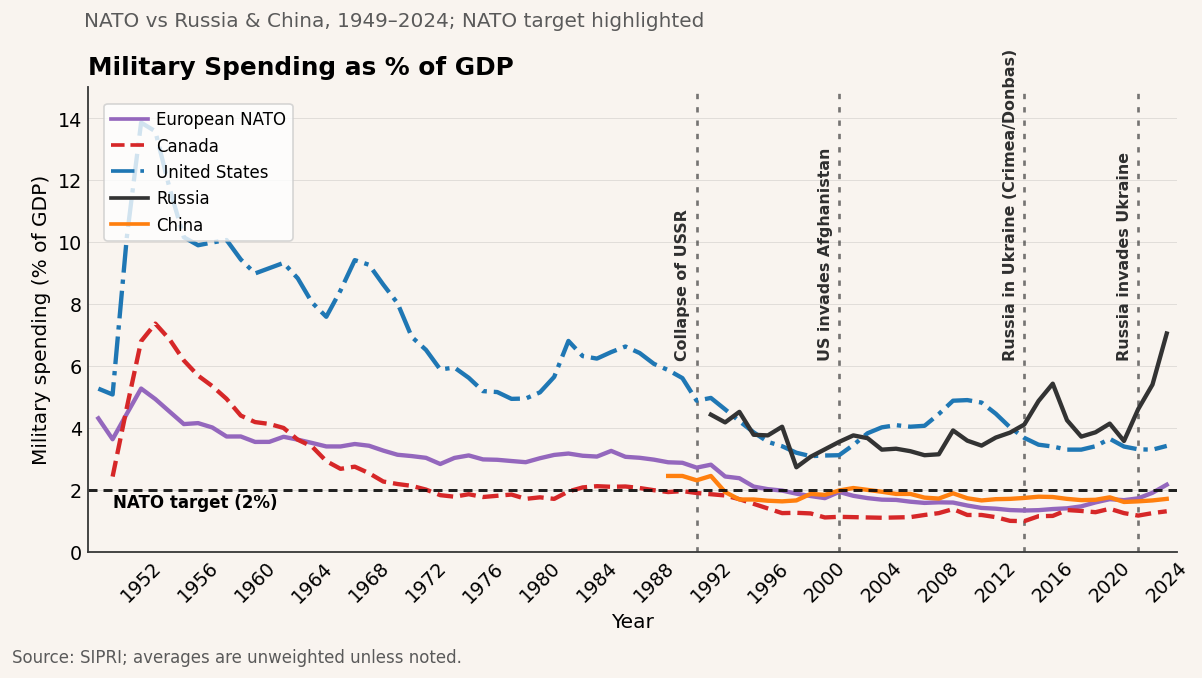

In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt

europe_grouped = (
    nato_long[nato_long["Country"].isin(european_nato)]
    .groupby(["Year"])["Spending"]
)

europe_mean = europe_grouped.mean()
europe_std = europe_grouped.std()


# Canada
canada_avg = (
    nato_long[nato_long["Country"].isin(canada_nato)]
    .groupby("Year")["Spending"]
    .mean()
    .reset_index()
)

# United States
us_avg = (
    nato_long[nato_long["Country"].isin(us_nato)]
    .groupby("Year")["Spending"]
    .mean()
    .reset_index()
)

# -----------------------
# Plot with Russia & China (colorblind-friendly palette)
# -----------------------
fig = plt.figure(figsize=(10, 6.2), facecolor="#f9f4ef")  # very light tan
ax = plt.gca()
ax.set_facecolor("#f9f4ef")  # match background for the plotting area


# European NATO average (purple)
ax.plot(
    europe_mean.index, europe_mean.values,
    linewidth=2.6, color="#9467BD", label="European NATO"
)

# Canada (red, dashed)
ax.plot(
    canada_avg["Year"], canada_avg["Spending"],
    linewidth=2.6, linestyle="--", color="#D62728", label="Canada"
)

# United States (blue, dash-dot)
ax.plot(
    us_avg["Year"], us_avg["Spending"],
    linewidth=2.6, linestyle="-.", color="#1F77B4", label="United States"
)

# Russia (near-black)
ax.plot(
    russia_avg["Year"], russia_avg["Spending"],
    linewidth=2.6, color="#333333", label="Russia"
)

# China (orange)
ax.plot(
    china_avg["Year"], china_avg["Spending"],
    linewidth=2.6, color="#FF7F0E", label="China"
)

ax.text(
        1950, 1.3,
        "NATO target (2%)",
        fontsize=10,
        va="bottom", ha="left",
        color="#000000", weight = 'bold',
        bbox=dict(facecolor="none", edgecolor="none", pad=2.2),
        zorder=5
    )


# NATO guideline
ax.axhline(2, color="#0c0c0c", linestyle=(0, (3, 2)), linewidth=1.8, alpha=0.9)

# Event markers (thin, tidy, labeled)
events = [
    (1991, "Collapse of USSR"),
    (2001, "US invades Afghanistan"),
    (2014, "Russia in Ukraine (Crimea/Donbas)"),
    (2022, "Russia invades Ukraine"),
]

for x, _ in events:
    ax.axvline(x=x, color="#2f2f2f", linestyle=(0, (2, 3)), linewidth=1.6, alpha=0.65, zorder=1)

ymin, ymax = ax.get_ylim()
label_y = ymin + 0.06 * (ymax - ymin)   # low, but inside the chart

for x, label in events:
    ax.text(
        x - 1.5, label_y + 5,
        label,
        rotation=90,
        fontsize=9.5,
        va="bottom", ha="left",
        color="#2f2f2f", weight = 'bold',
        bbox=dict(facecolor="none", edgecolor="none", pad=2.2),
        zorder=5
    )

# Axes formatting
economist_axis_touches(ax)
ax.set_ylim(0, 15)
ax.set_xlabel("Year")
ax.set_ylabel("Military spending (% of GDP)")

# Title + subtitle (FT/Economist style: bold title, lighter subtitle)
title = "Military Spending as % of GDP"
subtitle = "NATO vs Russia & China, 1949–2024; NATO target highlighted"
ax.set_title(title, loc="left", fontweight="bold", pad=8)
fig.suptitle(subtitle, x=0.06, y=0.90, ha="left", fontsize=12, color="#5a5a5a")

# Legend (with opaque background for clarity)
leg = ax.legend(
    ncol=1,
    frameon=True,        # show background panel
    facecolor="white",   # solid white background
    edgecolor="#cccccc", # subtle gray border
    handlelength=2.2,
    handletextpad=0.5,
    borderaxespad=1.0,
    loc="upper left",
    fontsize=10
)

# Standardize line thickness inside legend
for line in leg.get_lines():
    line.set_linewidth(2.2)

# Ticks: nice integer years if your x is datetime/int; adjust as needed
ax.margins(x=0.01)
ax.tick_params(axis="both", which="major", labelsize=11.5)

# Caption / source note
add_caption(fig, "Source: SIPRI; averages are unweighted unless noted.")
import matplotlib.ticker as mticker

# Get current number of ticks
import matplotlib.ticker as mticker

# Get how many ticks you currently have
num_ticks = len(ax.get_xticks())

# Request roughly double
ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=num_ticks * 2))
ax.tick_params(axis="x", rotation=45)   # rotate all x tick labels
plt.tight_layout(rect=[0, 0.04, 1, 0.92])
plt.savefig(fname = 'countries_military_spending.png',dpi = 1000)

plt.show()


/var/folders/cw/m3xj051j4qdfbhhykf_lxz6r0000gp/T/ipykernel_95470/2784119615.py:88: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = (df.sort_values(["Country", "Year"])
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'IBM Plex Sans' not found.
findfont: Font family 'Source Sans 3' not found.
findfont: Font family 'Lato

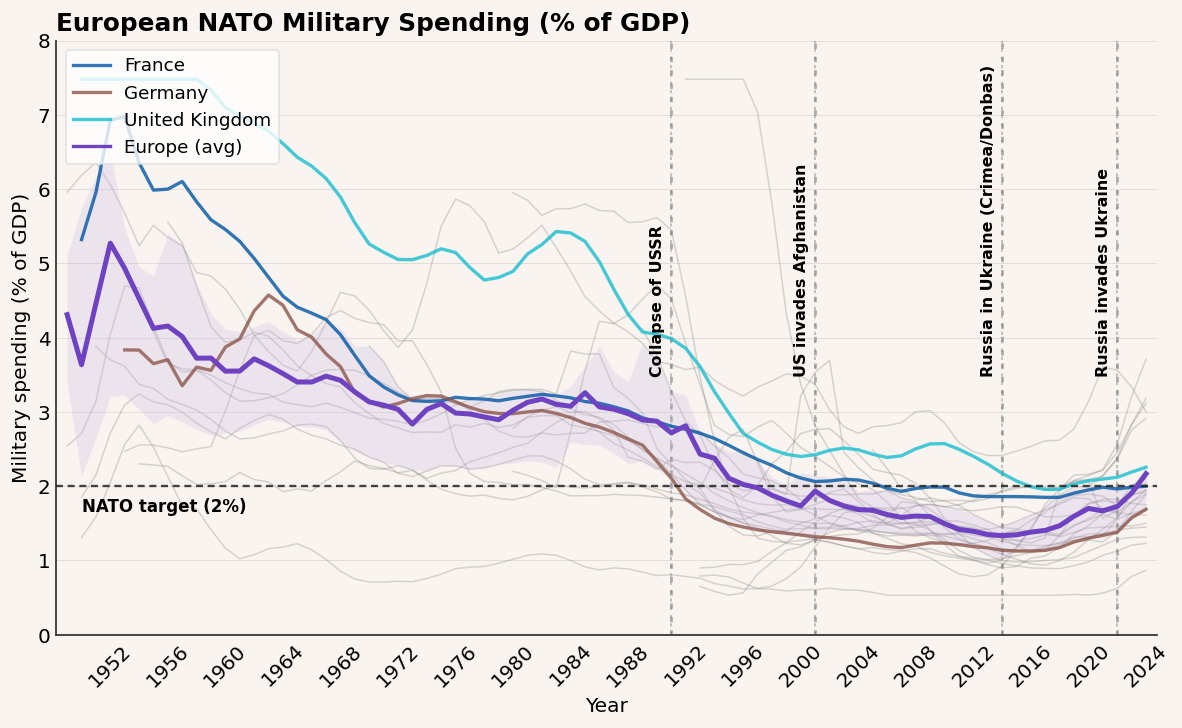

In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# -----------------------
# Economist / FT-like Matplotlib style
# -----------------------
def set_pubstyle_econ_ft(base_fontsize=12):
    mpl.rcParams.update({
        # Typography
        "font.family": ["IBM Plex Sans", "Source Sans 3", "Lato", "DejaVu Sans"],  
        "font.size": base_fontsize,
        "axes.titlesize": base_fontsize * 1.6,
        "axes.labelsize": base_fontsize * 1.25,
        "legend.fontsize": base_fontsize * 0.95,
        "xtick.labelsize": base_fontsize * 1.0,
        "ytick.labelsize": base_fontsize * 1.0,

        # Lines & grid
        "axes.grid": True,
        "grid.linestyle": "-",
        "grid.linewidth": 0.6,
        "grid.alpha": 0.35,
        "axes.axisbelow": True,

        # Spines
        "axes.spines.top": False,
        "axes.spines.right": False,

        # Figure
        "figure.dpi": 120,
        "savefig.dpi": 300,
        "savefig.bbox": "tight",

        # Legend
        "legend.frameon": False,
        "legend.loc": "upper left",

        # Tick params
        "xtick.major.size": 0,
        "ytick.major.size": 0,
        "xtick.minor.size": 0,
        "ytick.minor.size": 0,
    })
    
def economist_axis_touches(ax):
    # Subtle, slightly thicker left/bottom spines like FT/Economist
    ax.spines["left"].set_linewidth(1.1)
    ax.spines["bottom"].set_linewidth(1.1)
    ax.spines["left"].set_color("#3a3a3a")
    ax.spines["bottom"].set_color("#3a3a3a")
    ax.grid(axis="y", color="#8a8a8a")
    ax.grid(axis="x", visible=False)

def add_caption(fig, text, y_offset=0.02):
    # Small gray source/caption at the bottom-left
    fig.text(
        0.0, y_offset, text,
        ha="left", va="bottom",
        fontsize=10, color="#5a5a5a"
    )

# -----------------------
# Plot with Russia & China (colorblind-friendly palette)
# -----------------------
fig = plt.figure(figsize=(10, 6.2), facecolor="#f9f4ef")  # very light tan
ax = plt.gca()
ax.set_facecolor("#f9f4ef")  # match background for the plotting area


df = nato_long.copy()
df = df[df["Country"].isin(european_nato)]
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Spending"] = _to_number_percent(df["Spending"])
df = df.dropna(subset=["Year", "Spending"]).astype({"Year": int})

# european average series cleanup
emean = pd.Series(europe_mean.values, index=europe_mean.index)
emean.index = _ensure_year_index(emean.index)
emean = pd.to_numeric(_to_number_percent(emean), errors="coerce")
emean = emean.dropna().sort_index()
smooth_years=3      # try 0, 3, or 5
winsor=(0.01, 0.99) # set to None to disable
xtick_step=4
figsize=(10, 6.2)
highlight = ['Germany', 'France','United Kingdom']
# optional smoothing
if smooth_years and smooth_years > 1:
    df = (df.sort_values(["Country", "Year"])
            .groupby("Country", group_keys=False)
            .apply(lambda g: g.assign(
                Spending=g["Spending"].rolling(int(smooth_years), min_periods=1, center=True).mean()
            )))

# pivot for spread stats
wide = (df.pivot(index="Year", columns="Country", values="Spending")
            .sort_index())

# optional winsorization to tame outliers
if winsor:
    lo_q, hi_q = winsor
    lo = np.nanquantile(wide.values, lo_q)
    hi = np.nanquantile(wide.values, hi_q)
    wide = wide.clip(lower=lo, upper=hi)

q25 = wide.quantile(0.25, axis=1)
q75 = wide.quantile(0.75, axis=1)

# --- Plot

# faint per-country lines (neutral grey)
# Define highlight colors per country

highlight_colors = {
    "Russia": "#333333",                  # near-black
    "China": "#FF7F0E",                   # orange
    "United States of America": "#1f77b4",# strong blue
    "United Kingdom": "#17becf",          # cyan / teal
    "France": "#0055A4",                  # deep flag blue
    "Ukraine": "#FFD700",                 # golden yellow
    "Germany": "#8c564b",                 # brownish gray
    "Saudi Arabia": "#006C35"             # emerald green
}

for c in sorted(wide.columns):
    col = "#7f7f7f"
    alpha = 0.3
    lw = 0.9
    z = 2

    if c in highlight_colors:
        col = highlight_colors[c]
        alpha = 0.8
        lw = 2.0
        z = 4
        ax.plot(
            wide.index, wide[c].values,
            color=col, linewidth=lw, alpha=alpha, zorder=z, label=c
        )
    else:
        ax.plot(
            wide.index, wide[c].values,
            color=col, linewidth=lw, alpha=alpha, zorder=z
        )


# IQR band (adds structure without clutter)
ax.fill_between(wide.index, q25.values, q75.values,
                color="#c9b6e6", alpha=0.25, linewidth=0, zorder=3)

# European average on top
ax.plot(emean.index, emean.values, color="#6f42c1", linewidth=3.0, zorder=5, label="Europe (avg)")

# 2% NATO target
ax.axhline(2, color="#222", linestyle=(0, (3, 2)), linewidth=1.4, alpha=0.85, zorder=4, )#label="NATO target (2%)")

ax.text(
        1950, 1.6,
        "NATO target (2%)",
        fontsize=10,
        va="bottom", ha="left",
        color="#000000", weight = 'bold',
        bbox=dict(facecolor="none", edgecolor="none", pad=2.2),
        zorder=5
    )

# restrained event markers + small labels near top
for x, _ in events:
    ax.axvline(x=x, color="#444", linestyle=(0, (2, 3)), linewidth=1.0, alpha=0.35, zorder=1)

economist_axis_touches(ax)
ax.set_ylim(0, 8)
ax.set_xlabel("Year")
ymin, ymax = ax.get_ylim()
label_y = ymin + 0.9 * (ymax - ymin)
events = [
    (1991, "Collapse of USSR"),
    (2001, "US invades Afghanistan"),
    (2014, "Russia in Ukraine (Crimea/Donbas)"),
    (2022, "Russia invades Ukraine"),
]

for x, _ in events:
    ax.axvline(x=x, color="#7f7f7f", linestyle=(0, (2, 3)), linewidth=1.6, alpha=0.65, zorder=1)

ymin, ymax = ax.get_ylim()
label_y = ymin + 0.06 * (ymax - ymin)   # low, but inside the chart

for x, label in events:
    ax.text(
        x - 1.5, label_y +3,
        label,
        rotation=90,
        fontsize=9.5,
        va="bottom", ha="left",
        color="#000000", weight = 'bold',
        zorder=5
    )
# labels & ticks
ax.set_xlabel("Year")
ax.set_ylabel("Military spending (% of GDP)")
ax.set_title("European NATO Military Spending (% of GDP)", loc="left", fontweight="bold")
#fig.suptitle(subtitle, x=0.06, y=1.0, ha="left", fontsize=12, color="#5a5a5a")

ax.xaxis.set_major_locator(mticker.MultipleLocator(xtick_step))
ax.tick_params(axis="x", rotation=45)
ax.margins(x=0.01)

# lean legend
leg = ax.legend(loc="upper left", frameon=True, facecolor="white", edgecolor="#ddd")
for line in leg.get_lines():
    line.set_linewidth(2.0)
plt.savefig(fname = 'european_countries_military_spending.png',dpi = 1000)

fig.tight_layout()
#return fig, ax